In [2]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"khaikal","key":"9e492a7553b8e713debda6f4f6810151"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
! kaggle datasets download linjustin/train-val-test-tcga-coad-msi-mss

train-val-test-tcga-coad-msi-mss.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
import os
import zipfile

local_zip = '/content/train-val-test-tcga-coad-msi-mss.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [5]:
# Mendefenisikan data untuk test dan train
base_dir = '/content/tcga_coad_msi_mss'

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

train_msimut_dir = os.path.join(train_dir, 'MSIMUT')
train_mss_dir = os.path.join(train_dir, 'MSS')

val_msimut_dir = os.path.join(val_dir, 'MSIMUT')
val_mss_dir = os.path.join(val_dir, 'MSS')

In [6]:
print('Train MSIMUT :', os.listdir(train_msimut_dir)[:2])
print('Train MSS :', os.listdir(train_mss_dir)[:2])

print('Val MSIMUT :', os.listdir(val_msimut_dir)[:2])
print('Val MSS :', os.listdir(val_mss_dir)[:2])


Train MSIMUT : ['blk-SIIELCANSIDS-TCGA-CK-5913-01Z-00-DX1.jpg', 'blk-RTSPTQTKCYGP-TCGA-F4-6703-01Z-00-DX1.jpg']
Train MSS : ['blk-TPLVGEKMIEYY-TCGA-AH-6544-01Z-00-DX1.jpg', 'blk-RVVFEDSKFAHN-TCGA-AA-3875-01Z-00-DX1.jpg']
Val MSIMUT : ['blk-ECAPVFGHEAEP-TCGA-A6-3809-01Z-00-DX1.jpg', 'blk-TETLVKFQEYAP-TCGA-AA-A01P-01Z-00-DX1.jpg']
Val MSS : ['blk-TVLERLMTKIKT-TCGA-CK-6748-01Z-00-DX1.jpg', 'blk-RSIEVTPTFRTY-TCGA-DC-4745-01Z-00-DX1.jpg']


In [7]:
print(len(os.listdir(train_msimut_dir)))
print(len(os.listdir(train_mss_dir)))
print(len(os.listdir(val_msimut_dir)))
print(len(os.listdir(val_mss_dir)))

60031
93818
7503
11727


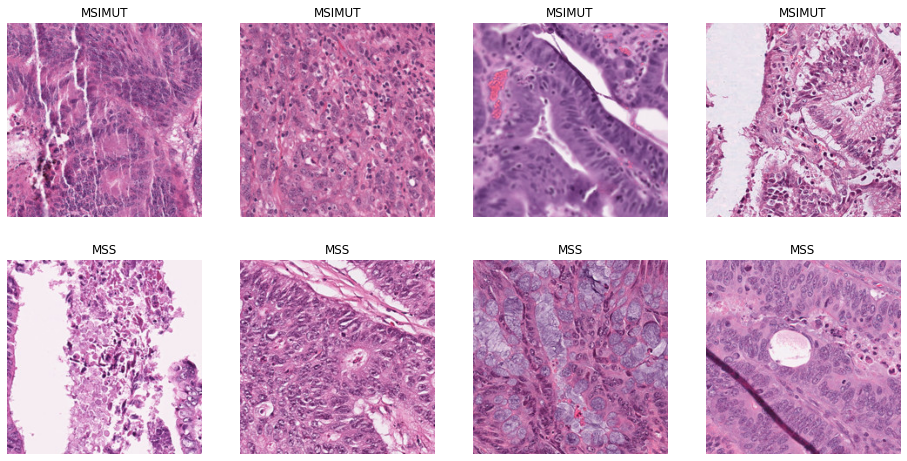

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


nrows = 2
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches( ncols * 4,nrows * 4)

pic_index += 8
msimut_img = [os.path.join(train_msimut_dir, fname) 
                for fname in os.listdir(train_msimut_dir)[pic_index-4:pic_index]]
mss_img  = [os.path.join(train_mss_dir, fname) 
                for fname in os.listdir(train_mss_dir)[pic_index-4:pic_index]]

for i, img_path in enumerate(msimut_img+mss_img):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title(img_path.split(os.path.sep)[-2])

plt.show()

# 2. Preprocessing Data

In [9]:
# Tulis Kode Anda Disini
import cv2
import numpy as np

# Gather data test
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (100,100))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)
            
train_data = np.array(train_data)
train_label = np.array(train_label)

In [10]:
# Tulis Kode Anda Disini
import cv2
import numpy as np

# Gather data test
val_data = []
val_label = []
for r, d, f in os.walk(val_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (250,250))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)
            
val_data = np.array(val_data)
val_label = np.array(val_label)

In [11]:
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (153849, 100, 100, 3)
Train Label =  (153849,)
Validation Data =  (19230, 250, 250, 3)
Validation Label =  (19230,)


In [ ]:
#Normalisasi data set
print("sebelum di Normalisasi ", train_data[0][0][0])



sebelum di Normalisasi  [180 131 216]


In [1]:
x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0

print("Data setelah di normalisasi : ", x_train[0][0][0])

NameError: ignored